# 0. Instalación de librerías

In [5]:
!pip install streamlit

#https://dashboard.ngrok.com/signup
!pip install --upgrade typing_extensions
!pip install openai
!pip install pypdf
!pip install langchain

  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)
  Attempting uninstall: typing_extensions
    Found existing installation: typing_extensions 4.11.0
    Uninstalling typing_extensions-4.11.0:
      Successfully uninstalled typing_extensions-4.11.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


  Using cached openai-1.55.0-py3-none-any.whl.metadata (24 kB)
Using cached openai-1.55.0-py3-none-any.whl (389 kB)
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.3/1.0 MB ? eta -:--:--
   -------------------- ------------------- 0.5/1.0 MB 172.9 kB/s eta 0:00:03
   ------------------------------- -------- 0.8

In [8]:
pip install -U langchain-community

   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 493.7 kB/s eta 0:00:04
   -------- ------------------------------- 0.5/2.4 MB 493.7 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.4 MB 516.0 kB/s eta 0:00:04
   ----------------- ---------------------- 1.0/2.4 MB 362.1 kB/s eta 0:00:04
   ----------------- -

# 1. Crear Vector Store

## 1.1. Carga de documento pdf

In [47]:
# Importe la clase PyPDFLoader del módulo langchain.document_loaders.
from langchain.document_loaders import PyPDFLoader

# Cree una instancia de la clase Py
# PDFLoader, pasando el nombre del archivo del documento PDF que desea cargar.
loader = PyPDFLoader("llm_doc.pdf")

# Este método lee el contenido del archivo PDF especificado al crear la instancia del cargador.
# El contenido del documento cargado se almacena en la variable 'documentos' para su posterior procesamiento.
documents = loader.load()

In [77]:
documents

[Document(metadata={'source': 'llm_doc.pdf', 'page': 0}, page_content='Building Pipelines and Environments for  \nLarge Language Models\nWhitepaper by Dr. Archisman Majumdar, Principal – Mphasis NEXT Labs | Amrit R, Lead Data Scientist - Mphasis NEXT Labs |  \nManami Mandal, Lead Data Scientist - Mphasis NEXT Labs | Dr. Udayaadithya Avadhanam, Principal & VP , Mphasis NEXT Labs |  \nSai Bharath Sundar, Manager (Data Science), Mphasis  NEXT Labs | Biju Mathews, Partner – Mphasis NEXT Labs |\nSiddharth Shankar, Affiliated to University of Maryland'),
 Document(metadata={'source': 'llm_doc.pdf', 'page': 1}, page_content='Contents\nIntroduction to LLMOps 1\nWhy LLMOps? 1\nTypical stages in an LLMOps Workflow 2\n 3.1 Data Collection, Preparation, Labelling 2\n 3.2 Selection of Foundation Models 3\n 3.3 Using Large Language Models - Prompting and Fine-tuning 4\n 3.4 Evaluation of Prompts and Models & Version Control 5\n 3.5 Deployment and Monitoring 6\n 3.6 Security, Privacy, Governance and 

## 1.2. Generación de 'chunks'

In [85]:
# Esta clase se utiliza para dividir textos en fragmentos más pequeños, basándose en el número de caracteres.
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Se especifica el tamaño de cada fragmento de texto (chunk_size) en 1000 caracteres y
# la superposición entre fragmentos consecutivos (chunk_overlap) en 100 caracteres.
text_splitter = RecursiveCharacterTextSplitter(chunk_size    = 1000,
                                               chunk_overlap = 100)

# Este método divide el contenido de los documentos cargados en fragmentos más pequeños,
# basándose en los parámetros de tamaño y superposición especificados.
doc_splits = text_splitter.split_documents(documents)

In [87]:
doc_splits[2].page_content

'1.\nIntroduction to LLMOps\nGenerative AI models have gained wide popularity in recent times with the adoption of  \ntransformer-based neural network architectures. Generative model’s ability to generate new data \nenables them to go beyond traditional prediction and classification use cases. These models \nare now used across domains and use cases like chatbots, question answering, fraud detection, \nprotein folding and many more.\nGenerative AI models for natural language use cases are powered by Large Language Models (LLMs). \nLLMs are transformer-based Deep Learning architectures that harness vast amounts of textual \ndata to develop language and domain understanding. The models are built with an emphasis on \ngenerating human-like responses and reasoning. Their ability to understand human languages allows \nthem to serve as powerful tools for information retrieval, natural language processing, language \ntranslation and even creative writing.'

In [89]:
doc_splits[2].metadata

{'source': 'llm_doc.pdf', 'page': 2}

In [91]:
doc_splits[3].page_content

'translation and even creative writing.\nUsing large language models in production environments poses a certain unique set of challenges \nsuch as organizing LLMs into agents for sub-tasks, developing robust instructions for each  \nLLM agent, evaluating the correctness of generated response and efficiencies with fine-tuning.  \nHence, effective usage in a production environment requires appropriate infrastructure and practices \nfocusing on experimentation, deployment, management and monitoring of large language models. \nLarge Language Model Operations (LLMOps) is a framework of tools and best practices  \nto manage the lifecycle of LLM-powered applications, from development to deployment  \nand maintenance.\nThe aim is to enable AI capabilities with LLMs by developing better prompts, longer context, \nfaster inference and customized techniques that enable rapid experimentation and innovation \nwith LLMs. Together, these allow data scientists and engineers to collaborate effectively 

In [93]:
doc_splits[3].metadata

{'source': 'llm_doc.pdf', 'page': 2}

## 1.3. Crear Vector Store como dataframe

In [96]:
import pandas as pd
# Crear una lista de diccionarios a partir de los fragmentos de documento divididos previamente.
# Cada diccionario contiene dos claves: 'Chunks', que almacena el contenido del fragmento de texto,
# y 'Metadata', que almacena los metadatos asociados a dicho fragmento.
data = [{'Chunks': doc.page_content, 'Metadata': doc.metadata} for doc in doc_splits]
# Crear un DataFrame de pandas a partir de la lista de diccionarios 'data'.
df_vector_store = pd.DataFrame(data)
df_vector_store.head()

,Chunks,Metadata
0,Building Pipelines and Environments for \nLar...,"{'source': 'llm_doc.pdf', 'page': 0}"
1,Contents\nIntroduction to LLMOps 1\nWhy LLMOps...,"{'source': 'llm_doc.pdf', 'page': 1}"
2,1.\nIntroduction to LLMOps\nGenerative AI mode...,"{'source': 'llm_doc.pdf', 'page': 2}"
3,translation and even creative writing.\nUsing ...,"{'source': 'llm_doc.pdf', 'page': 2}"
4,"with LLMs. Together, these allow data scientis...","{'source': 'llm_doc.pdf', 'page': 2}"


# 2.  Formulación de pregunta

In [99]:
# Importar la clase OpenAI del módulo openai. Esta clase proporciona acceso a las API de OpenAI.
from openai import OpenAI
import numpy as np
import json
# Abrir el archivo 'credentials.json' en modo de lectura.
file_name = open('credentials.json')
# Cargar el contenido del archivo JSON en una variable llamada 'config_env'.
config_env = json.load(file_name)
# Extraer el valor asociado a la clave 'openai_key' del diccionario 'config_env'.
api_key = config_env["openai_key"]
# Crear una instancia de la clase OpenAI, proporcionando la clave API extraída del archivo de configuración.
client = OpenAI(api_key=api_key)

# Llamar al método 'embeddings.create' del cliente de OpenAI para crear embeddings del texto.
# Se especifica el modelo 'text-embedding-ada-002', el texto de entrada y el formato de codificación.
# La función retorna la representación vectorial del texto.
def text_embedding(text=[]):
    embeddings = client.embeddings.create(model="text-embedding-ada-002",
                                          input=text,
                                          encoding_format="float")
    return embeddings.data[0].embedding

# Añadir una nueva columna 'Embedding' al DataFrame 'df_vector_store'.
df_vector_store["Embedding"] = df_vector_store["Chunks"].apply(lambda x: text_embedding([x]))
df_vector_store["Embedding"] = df_vector_store["Embedding"].apply(np.array)

# Guardar el DataFrame 'df_vector_store' en un archivo con formato pickle.
df_vector_store.to_pickle('df_vector_store.pkl')
df_vector_store.head()

,Chunks,Metadata,Embedding
0,Building Pipelines and Environments for \nLar...,"{'source': 'llm_doc.pdf', 'page': 0}","[-0.001881948, -0.012164683, 0.016830197, -0.0..."
1,Contents\nIntroduction to LLMOps 1\nWhy LLMOps...,"{'source': 'llm_doc.pdf', 'page': 1}","[0.003051758, -0.004399897, -0.0022133628, -0...."
2,1.\nIntroduction to LLMOps\nGenerative AI mode...,"{'source': 'llm_doc.pdf', 'page': 2}","[-0.021225838, -0.008486297, -0.013957637, -0...."
3,translation and even creative writing.\nUsing ...,"{'source': 'llm_doc.pdf', 'page': 2}","[-0.006604034, -0.005598843, -0.0033758248, -0..."
4,"with LLMs. Together, these allow data scientis...","{'source': 'llm_doc.pdf', 'page': 2}","[0.006892844, -0.009389246, 0.002564013, -0.05..."


In [242]:
# Definir una cadena de texto que contiene la consulta de interés.
query = '¿Que es el ajuste eficiente de parametros?'
# Generar la representación vectorial (embedding) de la consulta de texto utilizando la función 'text_embedding'.
query_embedding = text_embedding(query)
query_embedding

[-0.018983169,
 0.014651991,
 0.0024825463,
 -0.008593825,
 -0.018585688,
 0.014240803,
 0.007086136,
 -0.0012061509,
 -0.017173942,
 -0.024890566,
 0.032922436,
 0.011177454,
 0.0048143235,
 0.010265988,
 -0.013665141,
 -0.009710885,
 0.014090034,
 -0.009566969,
 0.019079113,
 0.009333963,
 -0.022341203,
 0.010115219,
 -0.0027018464,
 -0.023423998,
 0.005300896,
 0.0116434675,
 0.0123630455,
 -0.014624579,
 0.005636699,
 -0.03264831,
 0.043092478,
 0.013726818,
 -0.018517157,
 -0.0116434675,
 -0.0057086567,
 -0.010409904,
 -0.0052494975,
 -0.011787383,
 0.040625352,
 0.0028680346,
 0.02689168,
 0.009046131,
 0.009176341,
 0.0065858574,
 0.004409989,
 0.018914638,
 0.006582431,
 -0.00050713157,
 -0.056250487,
 0.013905,
 -0.0051501268,
 0.005684671,
 -0.051316235,
 -0.01872275,
 0.02894762,
 0.002251253,
 -0.023972247,
 0.009320256,
 0.016666811,
 -0.022217846,
 -0.02040862,
 -0.020614214,
 -0.02410931,
 0.0073259957,
 0.008285434,
 0.0066578155,
 -0.000885767,
 -0.01232878,
 0.0290572

# 3. Búsqueda semántica

In [244]:
# Definir una función para calcular el producto punto entre dos vectores.
def get_dot_product(row):
    return np.dot(row, query_vector)

# Definir una función para calcular la similitud de coseno entre dos vectores.
def cosine_similarity(row):
    denominator1 = np.linalg.norm(row)
    denominator2 = np.linalg.norm(query_vector.ravel())
    dot_prod = np.dot(row, query_vector)
    return dot_prod/(denominator1*denominator2)

# Definir una función para obtener los fragmentos de texto más relevantes desde un almacenamiento
# vectorial dada una consulta.
def get_context_from_query(query, vector_store, n_chunks = 5):
    global query_vector
    # Convertir el embedding de la consulta en un array de numpy.
    query_vector = np.array(query_embedding)
    # Calcular la similitud de coseno para cada vector en el almacenamiento y ordenar los resultados
    # de mayor a menor similitud, seleccionando los índices de los 'n_chunks' más altos.
    top_matched = (
        vector_store["Embedding"]
        .apply(cosine_similarity)
        .sort_values(ascending=False)[:n_chunks]
        .index)
    # Seleccionar los fragmentos de texto correspondientes a los índices de mayor similitud.
    top_matched_df = vector_store[vector_store.index.isin(top_matched)][["Chunks"]]
    # Devolver una lista con los fragmentos de texto seleccionados.
    return list(top_matched_df['Chunks'])

# Utilizar la función 'get_context_from_query' para obtener los fragmentos de texto más relevantes
# dada la consulta especificada y el almacenamiento vectorial 'df_vector_store', limitando el número
# de fragmentos a 5.
Context_List = get_context_from_query(
    query        = query,
    vector_store = df_vector_store,
    n_chunks     = 5)

# Iterar sobre la lista de fragmentos de texto relevantes e imprimir cada uno, separados por líneas
for chunk in Context_List:
  print("#########################")
  print(chunk)

#########################
examples of input-output pairs and solves new tasks.
Few-shot or zero-shot prompting is not always sufficient in customizing model behavior 
for complex tasks. In such scenarios, tuning of the models may be required to improve the 
performance of the model to deliver specific and optimal outputs. There are two primary ways in 
which a model can be tuned: Fine-tuning and Parameter-efficient Fine-tuning.
• Fine-tuning: In this method, the model is pre-trained on a generic dataset and after that, it   
is copied and retrained using the learned weights. The challenge of fine-tuning an LLM model  
is that since it is a large model, it takes an exceptionally long time to update every weight.   
Therefore, parameter-efficient tuning is preferred more in the case of LLMs.
• Parameter Efficient Fine-Tuning (PEFT): It includes training only a small subset of    
 parameters that are identified as the most important ones out of the lot. These parameters
#################

# 5. Construir prompt

In [247]:
custom_prompt = """
Eres una Inteligencia Artificial super avanzada que trabaja asistente personal.
Utilice los RESULTADOS DE BÚSQUEDA SEMANTICA para responder las preguntas del usuario.
Solo debes utilizar la informacion de la BUSQUEDA SEMANTICA si es que hace sentido y tiene relacion con la pregunta del usuario.
Si la respuesta no se encuentra dentro del contexto de la búsqueda semántica, no inventes una respuesta, y responde amablemente que no tienes información para responder.

RESULTADOS DE BÚSQUEDA SEMANTICA:
{source}

Lee cuidadosamente las instrucciones, respira profundo y escribe una respuesta para el usuario de al rededor 50 caracteres! recuerda 50 caracteres
""".format(source = str(Context_List))

# 6. Obtener respuesta

In [250]:
from openai import OpenAI
import json
# Abrir el archivo 'credentials.json' en modo de lectura.
file_name = open('credentials.json')
# Cargar el contenido del archivo JSON en una variable llamada 'config_env'.
config_env = json.load(file_name)
# Extraer el valor asociado a la clave 'openai_key' del diccionario 'config_env'.
api_key = config_env["openai_key"]
# Crear una instancia de la clase OpenAI, proporcionando la clave API extraída del archivo de configuración.
client = OpenAI(api_key=api_key)

# Utilizar el cliente de OpenAI para crear una completación de chat mediante el modelo "gpt-4".
# Se especifican varios parámetros en la llamada, incluyendo:
# - model: el identificador del modelo de lenguaje a utilizar, en este caso "gpt-4".
# - temperature: controla la aleatoriedad de las respuestas. Un valor de 0.0 genera la respuesta más probable.
# - messages: una lista de mensajes que conforman el contexto de la conversación. Se incluyen dos mensajes:
#   1. Un mensaje de rol "system", que proporciona instrucciones o contexto al modelo.
#   2. Un mensaje de rol "user", que contiene la consulta del usuario.
# 'custom_prompt': Variable definida previamente que contiene el texto del prompt del sistema.
completion = client.chat.completions.create(
  model="gpt-4",
  temperature = 0.0,
  messages=[
    {"role": "system", "content": custom_prompt},
    {"role": "user", "content": query}
  ]
)

# Imprimir el contenido del mensaje de la primera opción de completación generada por el modelo.
print(completion.choices[0].message.content)

Es un método que entrena solo un subconjunto de parámetros importantes.


# 7. Ejecutar Streamlit App

In [117]:
from google.colab import userdata
from pyngrok import ngrok
ngrok_token = userdata.get('ngrok_token')
!ngrok authtoken $ngrok_token

In [26]:
!nohup streamlit run app.py &
public_url = ngrok.connect(port='8501')
public_url

nohup: appending output to 'nohup.out'


'http://6f19-34-68-3-131.ngrok-free.app'

In [25]:
# Terminate all active ngrok tunnels
ngrok.kill()

In [67]:
df = pd.read_excel("PyR.xlsx")  

df['R_Embedding'] = df['Respuesta Humana'].apply(text_embedding)
df['P_Embedding'] = df['Pregunta'].apply(text_embedding)
df.to_excel("PyR_emb.xlsx", index=False)

print("Archivo actualizado guardado como 'PyR_emb.xlsx'")

Archivo actualizado guardado como 'PyR_emb.xlsx'


In [311]:
df = pd.read_excel("PyR_emb (2).xlsx")  
df['R_chat_Embedding'] = df['Respuesta_chat'].apply(text_embedding)
df.head()

,Pregunta,Respuesta Humana,R_Embedding,P_Embedding,Respuesta_chat,R_chat_Embedding
0,¿Cuál es el propósito de LLMOps?,Gestionar el ciclo de vida de aplicaciones LLM.,"[0.00027042362, 0.0067378567, 0.009124686, -0....","[-0.019339235, -0.016590511, -0.0019651272, -0...",LLMOps gestiona el ciclo de vida de las aplica...,"[-0.015975842, -0.008635406, -0.010134845, -0...."
1,¿Cuáles son las etapas típicas en un flujo de ...,"Preparación de datos, ajuste, monitoreo y desp...","[-0.03080829, -0.008289574, 0.008237925, -0.02...","[-0.013070622, -0.020413898, -0.0017522953, -0...",Las etapas típicas en un flujo de trabajo LLMO...,"[-0.018519316, -0.0126693975, 0.00023730719, -..."
2,¿Por qué es crucial la ingeniería de prompts p...,Garantizar la calidad y consistencia de salidas.,"[0.003037923, -0.004348887, 0.02069699, -0.008...","[-0.008338317, 0.0031063647, 0.006304998, -0.0...",La ingeniería de prompts es crucial para los L...,"[-0.02519018, 0.007704912, 0.011191114, -0.031..."
3,¿Qué es un entorno sandbox en LLMOps?,Un entorno de desarrollo para experimentos.,"[-0.018554486, -0.0015287875, 0.0069479784, -0...","[0.00010176106, -0.009441817, 0.019026693, -0....",Un entorno sandbox en LLMOps es equivalente a ...,"[-0.002574643, -0.020326484, 0.0174575, -0.027..."
4,¿Cuáles son los beneficios de la destilación d...,Reduce tamaño y costos manteniendo calidad.,"[0.0038974977, -0.0022749414, 0.020149963, 0.0...","[-0.014566572, 0.0008800918, 0.010577946, -0.0...",La destilación de modelos permite mantener cas...,"[-0.03143292, 0.01067108, -0.001880923, -0.016..."


In [301]:
!pip install Levenshtein

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------- -------------------------- 0.5/1.6 MB 1.0 MB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 493.7 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 493.7 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 493.7 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 493.7 kB/s eta 0:00:02
   ------------------- ----------------

In [343]:
import pandas as pd
from Levenshtein import ratio

df['Respuesta Humana'] = df['Respuesta Humana'].fillna("").astype(str)
df['Respuesta_chat'] = df['Respuesta_chat'].fillna("").astype(str)

# similitudes Levenshtein
def calcular_similitud(humana, chatbot):
    return ratio(humana, chatbot)

df['Similitud'] = df.apply(lambda row: calcular_similitud(row['Respuesta Humana'], row['Respuesta_chat']), axis=1)

# Definir un umbral de similitud para considerar una respuesta como correcta
umbral = 0.3
df['Correcto'] = df['Similitud'] >= umbral

accuracy = df['Correcto'].mean()

print(f"Accuracy del chatbot: {accuracy:.2%}")



Accuracy del chatbot: 62.50%


In [339]:
df.head(9)

,Pregunta,Respuesta Humana,R_Embedding,P_Embedding,Respuesta_chat,R_chat_Embedding,Similitud,Correcto
0,¿Cuál es el propósito de LLMOps?,Gestionar el ciclo de vida de aplicaciones LLM.,"[0.00027042362, 0.0067378567, 0.009124686, -0....","[-0.019339235, -0.016590511, -0.0019651272, -0...",LLMOps gestiona el ciclo de vida de las aplica...,"[-0.015975842, -0.008635406, -0.010134845, -0....",0.756303,True
1,¿Cuáles son las etapas típicas en un flujo de ...,"Preparación de datos, ajuste, monitoreo y desp...","[-0.03080829, -0.008289574, 0.008237925, -0.02...","[-0.013070622, -0.020413898, -0.0017522953, -0...",Las etapas típicas en un flujo de trabajo LLMO...,"[-0.018519316, -0.0126693975, 0.00023730719, -...",0.229268,False
2,¿Por qué es crucial la ingeniería de prompts p...,Garantizar la calidad y consistencia de salidas.,"[0.003037923, -0.004348887, 0.02069699, -0.008...","[-0.008338317, 0.0031063647, 0.006304998, -0.0...",La ingeniería de prompts es crucial para los L...,"[-0.02519018, 0.007704912, 0.011191114, -0.031...",0.170213,False
3,¿Qué es un entorno sandbox en LLMOps?,Un entorno de desarrollo para experimentos.,"[-0.018554486, -0.0015287875, 0.0069479784, -0...","[0.00010176106, -0.009441817, 0.019026693, -0....",Un entorno sandbox en LLMOps es equivalente a ...,"[-0.002574643, -0.020326484, 0.0174575, -0.027...",0.150000,False
4,¿Cuáles son los beneficios de la destilación d...,Reduce tamaño y costos manteniendo calidad.,"[0.0038974977, -0.0022749414, 0.020149963, 0.0...","[-0.014566572, 0.0008800918, 0.010577946, -0.0...",La destilación de modelos permite mantener cas...,"[-0.03143292, 0.01067108, -0.001880923, -0.016...",0.339869,True
5,¿Cuáles son los desafíos comunes en el desplie...,"Latencia alta, costos y privacidad de datos.","[-0.003185777, -0.02187534, 0.015336374, -0.02...","[-0.00063025526, -0.0046908213, 0.018074352, -...",El despliegue de LLMs implica retos como costo...,"[-0.009742945, -0.014656949, 0.0016341844, -0....",0.363636,True
6,¿Qué métricas se usan para evaluar los LLMs?,"BLEU, ROUGE, METEOR, BERTScore.","[-0.021074718, -0.022257349, 0.006810084, -0.0...","[-0.00045296218, 0.00045951497, 0.021244172, -...","Se utilizan Perplexity, METEOR Score, BERTScor...","[-0.030552255, -0.018240945, 0.016791774, -0.0...",0.456522,True
7,¿Qué es el ajuste eficiente de parámetros?,Entrenar solo parámetros clave para optimizar.,"[-0.025070313, 8.85313e-05, 0.031617694, -0.01...","[-0.022105895, 0.016113333, 0.016552787, -0.00...",Es un método que entrena solo un subconjunto d...,"[-0.040146258, -0.003698584, 0.027819932, -0.0...",0.495726,True


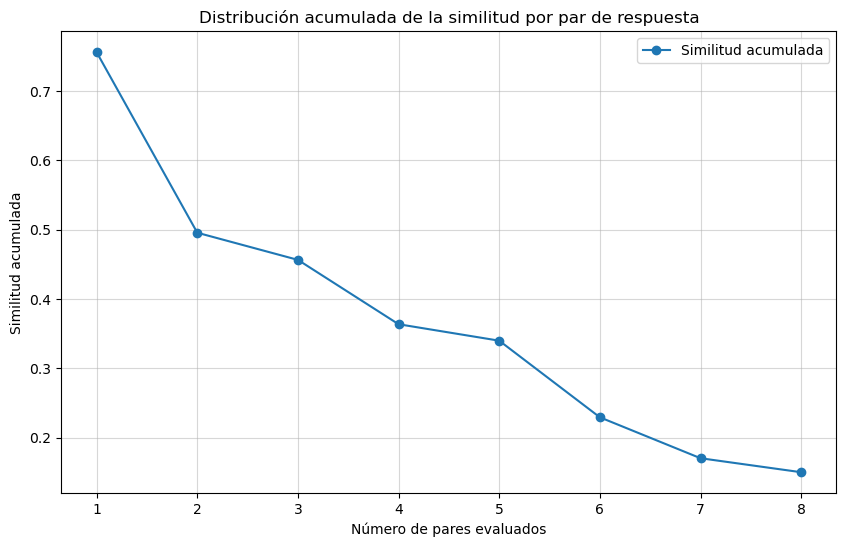

In [353]:
import matplotlib.pyplot as plt

# Ordenar los datoss
df_sorted = df.sort_values(by="Similitud", ascending=False).reset_index(drop=True)

# gráfica de la dist acumulada
plt.figure(figsize=(10, 6))
plt.plot(df_sorted.index + 1, df_sorted['Similitud'], label='Similitud acumulada', marker='o')

plt.title("Distribución acumulada de la similitud por par de respuesta")
plt.xlabel("Número de pares evaluados")
plt.ylabel("Similitud acumulada")
plt.legend()
plt.grid(alpha=0.5)

plt.show()


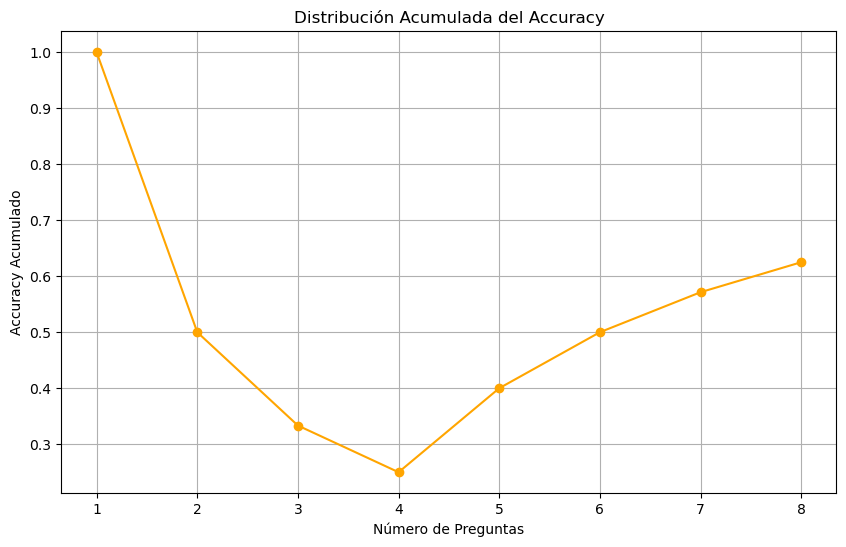

In [349]:
# Calcular el accuracy acumulado
df["Pregunta_Num"] = range(1, len(df) + 1)
df["Accuracy"] = df["Correcto"].cumsum() / df["Pregunta_Num"]

# Graficar l accuracy
plt.figure(figsize=(10, 6))
plt.plot(df["Pregunta_Num"], df["Accuracy"], marker='o', color='orange')
plt.title("Distribución Acumulada del Accuracy")
plt.xlabel("Número de Preguntas")
plt.ylabel("Accuracy Acumulado")
plt.grid()
plt.show()
